### At this stage, we will review the data loaded from the dataset, analyze it, put it into a convenient form for use and evaluate what needs to be taken into account when further working with the data.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import plotly.express as px

In [2]:
data_filename = 'dataset/family_data.csv'
df = pd.read_csv(data_filename)
df.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [3]:
data_filename = 'dataset/family_data.csv'
with open(data_filename) as f:
    reader = csv.DictReader(f)
    family_dict = list(reader)

family_dict[0]

{'family_id': '0',
 'choice_0': '52',
 'choice_1': '38',
 'choice_2': '12',
 'choice_3': '82',
 'choice_4': '33',
 'choice_5': '75',
 'choice_6': '64',
 'choice_7': '76',
 'choice_8': '10',
 'choice_9': '28',
 'n_people': '4'}

### For further work it will be much more convenient to use an ordered list of desired dates, rather than each time accessing the dictionary by the key 'choice_i'

In [4]:
family_dataset = []
for family in family_dict:
  family_data = dict()
  family_data['id'] = int(family['family_id'])
  family_data['n_members'] = int(family['n_people'])
  choise_list = []
  for i in range(10):
    choise_list.append(int(family['choice_' + str(i)]))
  family_data['dates'] = choise_list
  family_dataset.append(family_data)
family_dataset[0]


{'id': 0, 'n_members': 4, 'dates': [52, 38, 12, 82, 33, 75, 64, 76, 10, 28]}

First, let's check how many families and with what number of members are present in the dataset. Let's determine the total number of visitors.

In [5]:
num_of_members = dict()
for family in family_dataset:
  if family['n_members'] in num_of_members.keys() :
    num_of_members[family['n_members']] += 1
  else:
    num_of_members[family['n_members']] = 1

total_visitors = 0
for k, v in sorted(num_of_members.items()):
  print("Families with",  k, "members:", v)
  total_visitors += v * k
print()
print("Total number of visitors:", total_visitors)

Families with 2 members: 717
Families with 3 members: 981
Families with 4 members: 1451
Families with 5 members: 899
Families with 6 members: 494
Families with 7 members: 301
Families with 8 members: 157

Total number of visitors: 21003


### Number of families selecting each day (by priority)

The data is prepared. Let's start the analysis by identifying the most popular days for visiting. A graph of the number of people wishing to visit Santa is plotted. Lines of different colors indicate the family priority number. Analyzing the graph, we notice:
1. Some days have a particularly low value of possible visitors
2. The graph has a decreasing trend with distance from Christmas.
The second sign is quite understandable - visiting Santa is more popular as Christmas approaches, which means that the lower the number, the more people want to.
Let's figure out why the first conclusion arose.

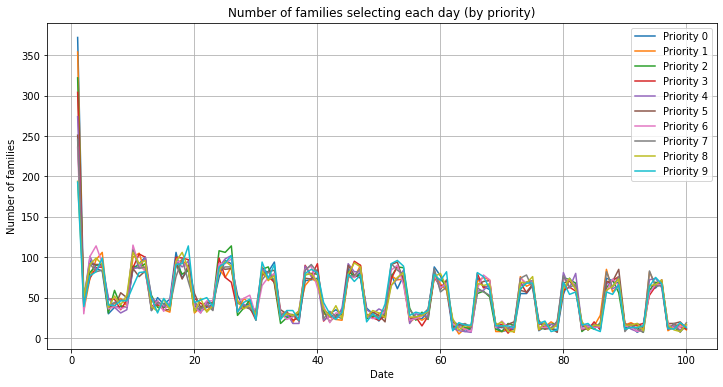

In [6]:
priority_counts = defaultdict(lambda: defaultdict(int))

for family in family_dataset:
    for priority, date in enumerate(family['dates']):
        priority_counts[priority][date] += 1

plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10", 10)

for priority in range(10):
    dates = sorted(priority_counts[priority].keys())
    counts = [priority_counts[priority][date] for date in dates]
    plt.plot(dates, counts, label=f'Priority {priority}', color=colors[priority])

plt.xlabel("Date")
plt.ylabel("Number of families")
plt.title("Number of families selecting each day (by priority)")
plt.legend()
plt.grid(True)
plt.show()


### Number of people selecting a day (by priority) - On 10 different graphs

For a more thorough analysis, we will build a separate graph for each priority.
From the graph we see that every four days the popularity decreases, and then rises again for the next 3 days. The most likely reason is the days of the week. From Monday to Thursday the popularity decreases, since most adults work. And from Friday to Sunday - it increases sharply

In [7]:
priority_counts = defaultdict(lambda: defaultdict(int))

for family in family_dataset:
    for priority, date in enumerate(family['dates']):
        priority_counts[priority][date] += family['n_members']

data = []
for priority in range(10):
    for date, count in priority_counts[priority].items():
        data.append({"priority": f"Priority {priority}", "date": date, "count": count})

df = pd.DataFrame(data)

fig1 = px.bar(df,
              x="date",
              y="count",
              animation_frame="priority",
              title="Number of people selecting a day (by priority)",
              labels={"date": "Date", "count": "Number of people", "priority": "Priority"},
              template="plotly_dark",
              color_discrete_sequence=["lightblue"])

fig1.update_layout(xaxis_title="Date", yaxis_title="Number of people", title_font_size=20, font=dict(size=14))
fig1.show()


### Number of people selecting a date as first priority

Now let's estimate what will happen if each family visits its first priority. From the graph we see that some days will significantly exceed the maximum number of visitors (especially on Christmas Eve).

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



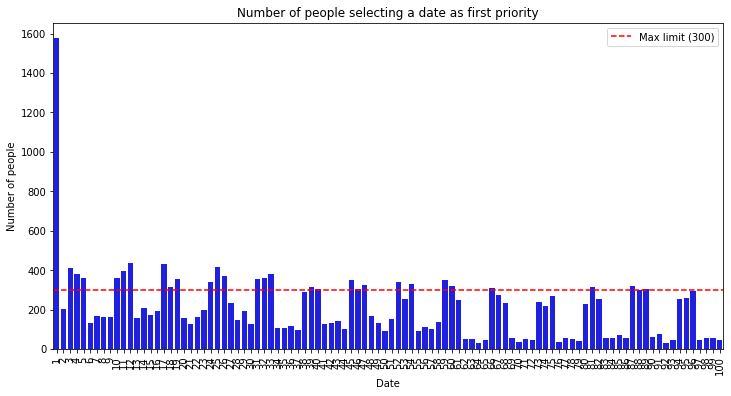

In [8]:
import pandas as pd

first_choice_counts = defaultdict(int)

for family in family_dataset:
    date = family['dates'][0]
    first_choice_counts[date] += family['n_members']

df_first_choice = pd.DataFrame(list(first_choice_counts.items()), columns=['Date', 'Number of people'])
df_first_choice = df_first_choice.sort_values('Date')

plt.figure(figsize=(12, 6))
sns.barplot(x=df_first_choice['Date'], y=df_first_choice['Number of people'], color='b')

plt.axhline(y=300, color='r', linestyle='--', label="Max limit (300)")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.title("Number of people selecting a date as first priority")
plt.legend()
plt.xticks(rotation=90)
plt.show()


### Greedy Algorithm

To minimize the overall score, we implement a greedy algorithm that strategically balances family preferences with daily visitor distribution:

$$Score = gift\_cost + P$$
$$P = \sum_{d=100}^{1} \frac{(N_d - 125)}{400} N_d^{\left(\frac{1}{2} + \frac{|N_d - N_{d+1}|}{50} \right)}$$

Since the visitor distribution penalty has the most significant impact on the total score, our approach is to minimize fluctuations between consecutive days while providing enough flexibility to accommodate family preferences.

In [9]:
DAYS = 100

print(f"Approximal daily rate is {total_visitors / DAYS}")

Approximal daily rate is 210.03


We will maintain consistent daily visitor counts between 195-225 people per day

The algorithm begins by assigning each family to their top-choice day, establishing an initial visitor distribution. Next, it identifies and resolves capacity issues by systematically adjusting assignments. For days exceeding MAX_PEOPLE_PER_DAY visitors, the algorithm reassigns families to alternative days, prioritizing moves that minimize additional penalties while improving the overall balance. Similarly, for days falling below MIN_PEOPLE_PER_DAY visitors, families are strategically moved from other days, focusing on cost-effective adjustments that fill the gap without creating new imbalances elsewhere.

In [57]:
MIN_PEOPLE_PER_DAY = 200
MAX_PEOPLE_PER_DAY = 220
PRIORITIES = 10

def compute_family_penalty(n_members, priority):
    penalties = [0, 50, 50 + 9 * n_members, 100 + 9 * n_members, 200 + 9 * n_members,
                 200 + 18 * n_members, 300 + 18 * n_members, 300 + 36 * n_members,
                 400 + 36 * n_members, 500 + 235 * n_members, 500 + 434 * n_members]
    return penalties[priority]
    

In [49]:
def find_cheapest_family_to_move_out(overcrowded_day, day_capacity, assignments):
    min_cost_per_person = float('inf')
    best_family = None

    for family in family_dataset:
        if assignments[family['id']][0] != overcrowded_day:
            continue  # Family not assigned to this day; skip

        current_day, current_priority = assignments[family['id']]
        current_cost = compute_family_penalty(family['n_members'], current_priority)

        # Try next preferences until finding a feasible day
        for next_priority in range(current_priority + 1, PRIORITIES): 
            next_day = family['dates'][next_priority]
            if day_capacity[next_day] + family['n_members'] <= MAX_PEOPLE_PER_DAY:
                next_cost = compute_family_penalty(family['n_members'], next_priority)
                cost_delta = (next_cost - current_cost) / family['n_members']
                if cost_delta < min_cost_per_person:
                    min_cost_per_person = cost_delta
                    best_family = (family, next_day, next_priority)
                break  # Only consider the next feasible preference

    return best_family  # Returns (family, new_day, new_priority) or None

In [50]:
def move_family(best_family, day_capacity, assignments):
    if not best_family:
        return  # No family to move (edge case)
    
    family, new_day, new_priority = best_family
    old_day, old_priority = assignments[family['id']]
    
    # Update day counts
    day_capacity[old_day] -= family['n_members']
    day_capacity[new_day] += family['n_members']
    
    # Update the family's assignment
    assignments[family['id']] = (new_day, new_priority)

In [51]:
def find_cheapest_family_to_move_in(undercrowded_day, day_capacity, assignments):
    best_family = None
    min_cost_per_person = float('inf')

    for family in family_dataset:
        # print(family['id'])
        current_day, current_priority = assignments[family['id']]
        current_cost = compute_family_penalty(family['n_members'], current_priority)
        # if current day accepts enough participants
        if day_capacity[current_day] - family['n_members'] < MIN_PEOPLE_PER_DAY:
            continue

        for next_priority in range(current_priority + 1, PRIORITIES): 
            next_day = family['dates'][next_priority]
            if next_day == undercrowded_day:
                next_cost = compute_family_penalty(family['n_members'], next_priority)
                cost_delta = (next_cost - current_cost) / family['n_members']
                if cost_delta < min_cost_per_person:
                    min_cost_per_person = cost_delta
                    best_family = (family, next_day, next_priority)
                break  # Only consider the next feasible preference

    return best_family  # Returns (family, new_day, new_priority) or None

In [58]:

day_capacity = defaultdict(int)  # Stores the number of people assigned to each day
assignments = {}  # family_id -> (day, priority)
gift_cost = 0

# Phase 1: Assign all to 1st choice
for family in family_dataset:
    day = family['dates'][0]
    day_capacity[day] += family['n_members']
    assignments[family['id']] = (day, 0)

# Phase 2: Fix overcapacity
for day in range(1, DAYS+1):
    while day_capacity[day] > MAX_PEOPLE_PER_DAY:
        # Find family with smallest cost increase per person
        best_family = find_cheapest_family_to_move_out(day, day_capacity, assignments)
        move_family(best_family, day_capacity, assignments)
        if not best_family:
            print(f"Could not reduce number of visitors on day {day}")
            break

# Phase 3: Fix undercapacity
for day in range(1, DAYS+1):
    while day_capacity[day] < MIN_PEOPLE_PER_DAY:
        # Find family that benefits most from moving here
        best_family = find_cheapest_family_to_move_in(day, day_capacity, assignments)
        move_family(best_family, day_capacity, assignments)
        if not best_family:
            print(f"Could not increase number of visitors on day {day}")
            break

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\azali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



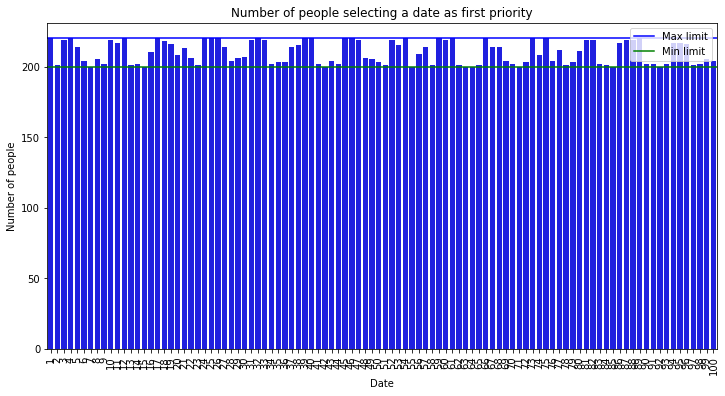

In [ ]:
df_capacity = pd.DataFrame(list(day_capacity.items()), columns=['Date', 'Number of people'])
df_capacity = df_capacity.sort_values('Date')

plt.figure(figsize=(12, 6))
sns.barplot(x=df_capacity['Date'], y=df_capacity['Number of people'], color='b')

plt.axhline(y=MAX_PEOPLE_PER_DAY, color='b', linestyle='-', label="Max limit")
plt.axhline(y=MIN_PEOPLE_PER_DAY, color='g', linestyle='-', label="Min limit")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.title("Final Distribution of People Across Days")
plt.legend()
plt.xticks(rotation=90)
plt.show()



In [54]:
# Compute penalties based on the given formula
gift_cost = 0
penalty = 0

for family in family_dataset:
    gift_cost += compute_family_penalty(family['n_members'], assignments[family['id']][1])

days_sorted = sorted(day_capacity.keys())
for i, day in enumerate(days_sorted):
    Nd = day_capacity[day]
    Nd_next = day_capacity[days_sorted[i+1]] if i < len(days_sorted) - 1 else Nd  # Handle last day case

    term = ((Nd - 125) / 400) * (Nd ** (1/2 + abs(Nd - Nd_next) / 50))
    penalty += term

print(f"Total Gift Cost: {gift_cost}")
print(f"Total Accounting Penalty: {penalty}")
print(f"Score: {gift_cost + penalty}")


Total Gift Cost: 170350
Total Accounting Penalty: 827.8412173780665
Score: 171177.84121737807


In [ ]:
# Side note for my teammates: dealing with overcapacity is earlier than fixing undercapacity because when overcapacity is not fixed all the families which have problem day as a priority can't live their current date. There are not so many visitors on the current date.
# Try leaving only phase 1 and phase 3 and look at the plot 